In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor as MLP
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA

In [2]:
X = np.genfromtxt('../datasets/Selective_descriptors_X')
Y = np.genfromtxt('../datasets/Selective_descriptors_Y').reshape((X.shape[0],1))
Y_error = np.genfromtxt('../datasets/Selective_descriptors_error')
X = StandardScaler().fit_transform(X)
X_train,X_test,Y_train,Y_test,e_train,e_test = train_test_split(X,Y,Y_error,test_size=0.10,random_state=1010)

n_train = X_train.shape[0]
n_test = X_test.shape[0]
d = X_train.shape[1]
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)
print(e_train.shape,e_test.shape)

(2270, 21) (253, 21)
(2270, 1) (253, 1)
(2270,) (253,)


In [4]:
#initializing weight for first layer(w1) and second
#Parameters
hdnode = 100
w1 = np.random.normal(0,0.001,d*hdnode).reshape((d,hdnode))
d1 = np.zeros((d,hdnode))
w2 = np.random.normal(0,0.001,hdnode).reshape((hdnode,1))
d2 = np.zeros(hdnode)
h  = np.zeros(hdnode)
              
mb = 100 #minibatch size
m = int(n_train/mb)
batch = np.arange(m)
lr = 0.00020
EP =20000
y = np.zeros((mb,1))
yh = np.zeros((n_train,1))
yh2 = np.zeros((n_test,1))

L_train= np.zeros(EP+1)
L_test = np.zeros(EP+1)

L01_train = np.zeros((EP+1))
L01_test = np.zeros((EP+1))

#relu
"""def g(A):
    return (np.maximum(A,0))

def gd(A):
    return (np.minimum(np.maximum(A,0),1))"""
#tanh
def g(A):
    return (np.tanh(A))

def gd(A):
    return (1-np.square(np.tanh(A)))


In [ ]:
EP = 4000
for ep in range(EP):
    #print(ep)

    yh = g(X_train.dot(w1)).dot(w2)
    yh2 = g(X_test.dot(w1)).dot(w2)
        
    L_train[ep] = LA.norm(yh-Y_train)/n_train
    L_test[ep]  = LA.norm(yh2-Y_test)/n_test
    
    print(ep,L_train[ep],L_test[ep])
        
    np.random.shuffle(batch)
    for i in range(m):
        st = batch[i]*mb
        ed = (batch[i]+1)*mb
        
        h  = g(X_train[st:ed].dot(w1))
        y = h.dot(w2)

        d2 = h.T.dot(Y_train[st:ed]-y)
        d1 = X_train[st:ed].T.dot(np.multiply((Y_train[st:ed]-y).dot(w2.T),gd(X_train[st:ed].dot(w1))))
        
        w2 += lr*d2
        w1 += lr*d1

0 0.0073305554353 0.0186004620129
1 0.00667410139406 0.0174408721904
2 0.00660812535698 0.0172599574347
3 0.00646865522677 0.0179105750804
4 0.00645224576242 0.0175856672141
5 0.00729594906967 0.0183221120021
6 0.00759252921372 0.0189973132684
7 0.00649159871529 0.0174680542683
8 0.00710187444881 0.0205509437331
9 0.00665323779017 0.0188515134435
10 0.00658270323096 0.0186053279959
11 0.00646693096057 0.018153244992
12 0.00660490061454 0.0172584872059
13 0.00655300832245 0.0172491945556
14 0.0070446034389 0.0202820288622
15 0.00639524008642 0.0175091187685
16 0.00681778224807 0.0195335759906
17 0.00642169772386 0.0175107345756
18 0.00643458576162 0.0178826872543
19 0.00708483769011 0.020610239421
20 0.00644543775873 0.017318921909
21 0.00702266301779 0.0179520453684
22 0.0070395197135 0.0179936454641
23 0.00838514589099 0.0208119624382
24 0.00702254171129 0.0203421003771
25 0.006373548275 0.0174233101714
26 0.00639005745924 0.0172942938153
27 0.00640436335894 0.0179095667409
28 0.00659

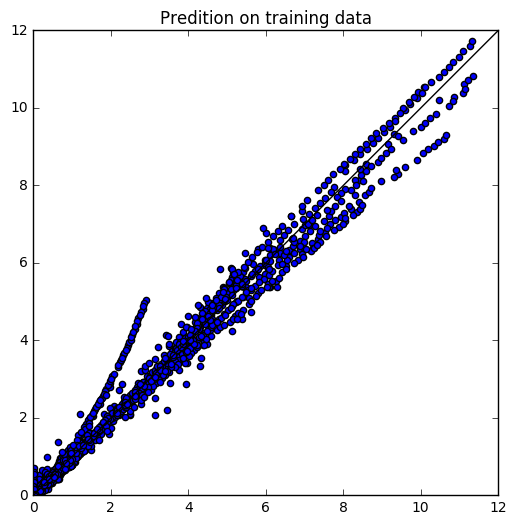

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(Y_train,yh)
plt.title('Predition on training data')
plt.plot(np.linspace(0,12,1000),np.linspace(0,12,1000),color='black')
plt.xlim((0,12))
plt.ylim((0,12))

plt.show()

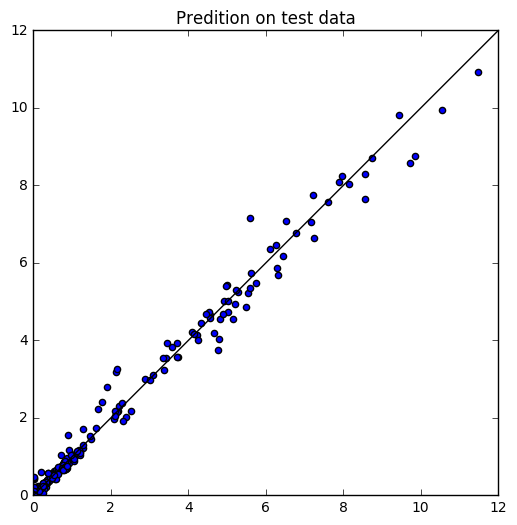

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test,yh2)
plt.title('Predition on test data')
plt.xlim((0,12))
plt.ylim((0,12))
plt.plot(np.linspace(0,12,1000),np.linspace(0,12,1000),color='black')
plt.show()

/Users/prguser/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


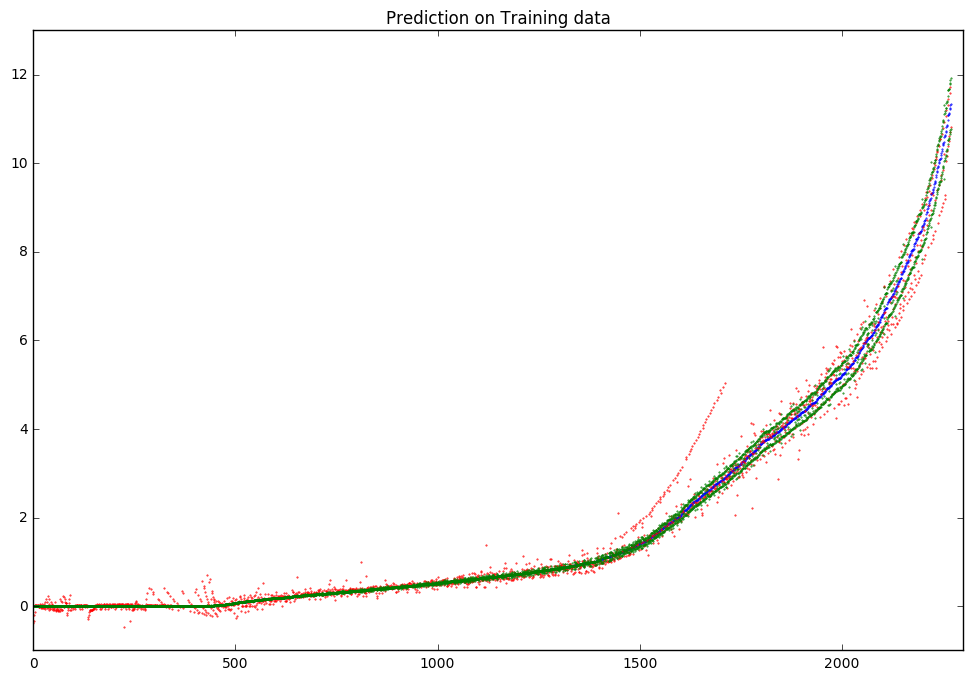

In [8]:
result = pd.DataFrame(columns=['Experiment','Prediction','error'])
result.Experiment = Y_train.reshape(n_train)
result.Prediction = yh.reshape((n_train,1))
result.error = e_train
result = result.sort(['Experiment','Prediction'],ascending=[1,1])
size=0.2
plt.figure(figsize=(12,8))
plt.xlim((0,2300))
plt.ylim((-1,13))
plt.scatter(np.arange(X_train.shape[0]),result.Experiment,color="blue",s=size)
plt.scatter(np.arange(X_train.shape[0]),result.Prediction,color="red",s=size)
plt.scatter(np.arange(X_train.shape[0]),result.Experiment+result.error,color="green",s=size)
plt.scatter(np.arange(X_train.shape[0]),result.Experiment-result.error,color="green",s=size)
plt.title('Prediction on Training data')
plt.show()

/Users/prguser/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


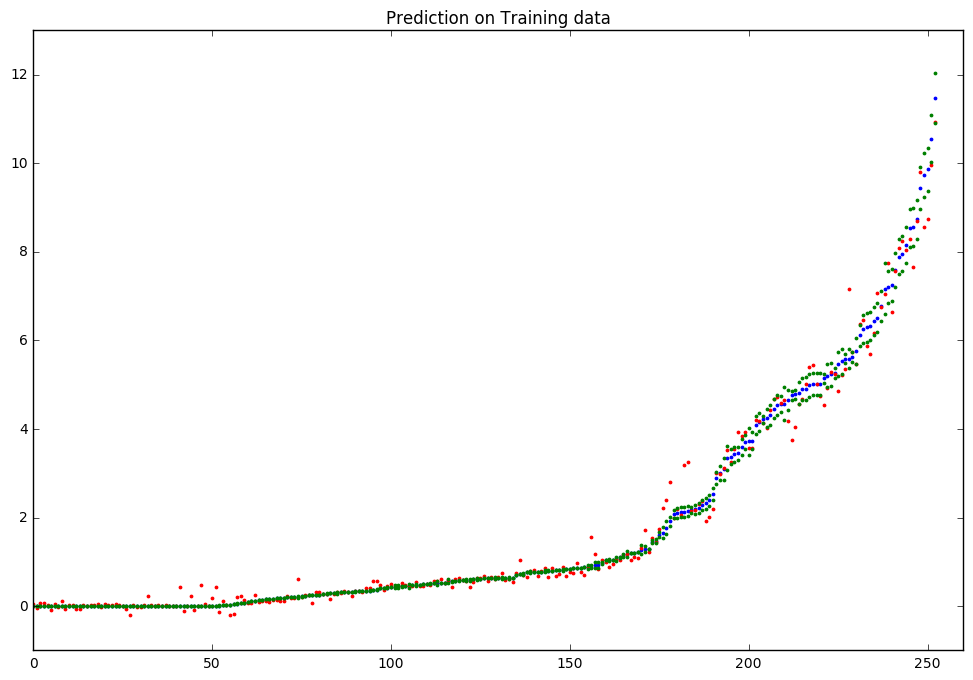

In [9]:
result = pd.DataFrame(columns=['Experiment','Prediction','error'])
result.Experiment = Y_test.reshape(n_test)
result.Prediction = yh2
result.error = e_test
result = result.sort(['Experiment','Prediction'],ascending=[1,1])
size = 3
plt.figure(figsize=(12,8))
plt.xlim((0,260))
plt.ylim((-1,13))
plt.scatter(np.arange(X_test.shape[0]),result.Experiment,color="blue",s=size)
plt.scatter(np.arange(X_test.shape[0]),result.Prediction,color="red",s=size)
plt.scatter(np.arange(X_test.shape[0]),result.Experiment+result.error,color="green",s=size)
plt.scatter(np.arange(X_test.shape[0]),result.Experiment-result.error,color="green",s=size)
plt.title('Prediction on Training data')
plt.show()

In [11]:
np.savetxt("w1_{}.txt".format(EP),w1)
np.savetxt("w2_{}.txt".format(EP),w2)